In [1]:
###### %matplotlib inline
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
from cytokit import config as cytokit_config
from cytokit import io as cytokit_io

# EXP_DIR = osp.join(os.environ['CYTOKIT_DATA_DIR'], '20180426_D18_R1', 'views', 'v00-all')
# RES_DIR = osp.join(os.environ['CYTOKIT_DATA_DIR'], '20180426_D18_R1', 'annotations')

EXP_DIR = osp.join(os.environ['CYTOKIT_DATA_DIR'], '20180430_D16_R2', 'views', 'v00-all')
RES_DIR = osp.join(os.environ['CYTOKIT_DATA_DIR'], '20180430_D16_R2', 'annotations')

In [2]:
config = cytokit_config.load(osp.join(EXP_DIR, 'config'))

In [3]:
#!ls $EXP_DIR/output/nopreproc/segm

In [4]:
path = osp.join(EXP_DIR, 'output', 'nopreproc', 'segm', 'reg001_X07_Y05.tif')
path

'/lab/data/20180430_D16_R2/views/v00-all/output/nopreproc/segm/reg001_X07_Y05.tif'

In [5]:
tile = cytokit_io.read_tile(path, config)
tile.shape

(7, 2, 4, 1008, 1344)

In [6]:
chs = ['HOECHST1', 'CD3', 'CD4', 'CD8']
iz = 0
icycs = [config.channel_names.index(ch) // config.n_channels_per_cycle for ch in chs] 
ichs = [config.channel_names.index(ch) % config.n_channels_per_cycle for ch in chs]
coords = list(zip(icycs, ichs))
coords

[(0, 0), (3, 2), (1, 3), (6, 1)]

In [7]:
tile_sub = np.stack([tile[icyc, iz, ich, :, :] for icyc, ich in coords], -1)
tile_sub.shape

(1008, 1344, 4)

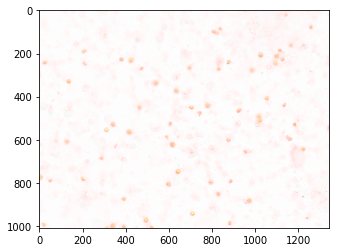

In [8]:
plt.imshow(tile_sub)

In [11]:
for i, ch in enumerate(chs):
    path = osp.join(RES_DIR, 'reg001_X07_Y05', 'reg001_X07_Y05-{}.tif'.format(ch.lower()))
    print(path)
    cytokit_io.save_image(path, tile_sub[..., i])

/lab/data/20180430_D16_R2/annotations/reg001_X07_Y05/reg001_X07_Y05-hoechst1.tif
/lab/data/20180430_D16_R2/annotations/reg001_X07_Y05/reg001_X07_Y05-cd3.tif
/lab/data/20180430_D16_R2/annotations/reg001_X07_Y05/reg001_X07_Y05-cd4.tif
/lab/data/20180430_D16_R2/annotations/reg001_X07_Y05/reg001_X07_Y05-cd8.tif
